In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

<Client: 'tcp://127.0.0.1:43847' processes=4 threads=8, memory=34.36 GB>

In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_hourly.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont_hourly','025deg_jra55_ryf_nostress_hourly','025deg_jra55_ryf_nostress_naive']

In [4]:
temp_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_con = cc.querying.getvar(expt = expt[0], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

temp_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_buo = cc.querying.getvar(expt = expt[1], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

temp_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_temp', frequency = '1 hourly')
salt_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'surface_salt', frequency = '1 hourly')
pme_river_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'pme_river', frequency = '1 hourly')
hblt_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'mld', frequency = '1 hourly')
heat_sfc_naive = cc.querying.getvar(expt = expt[2], session = session, variable = 'net_sfc_heating', frequency = '1 hourly')

## 1. Time averaged plots

Text(0.5, 1.0, 'Surface heat (Nostress - naive run)')

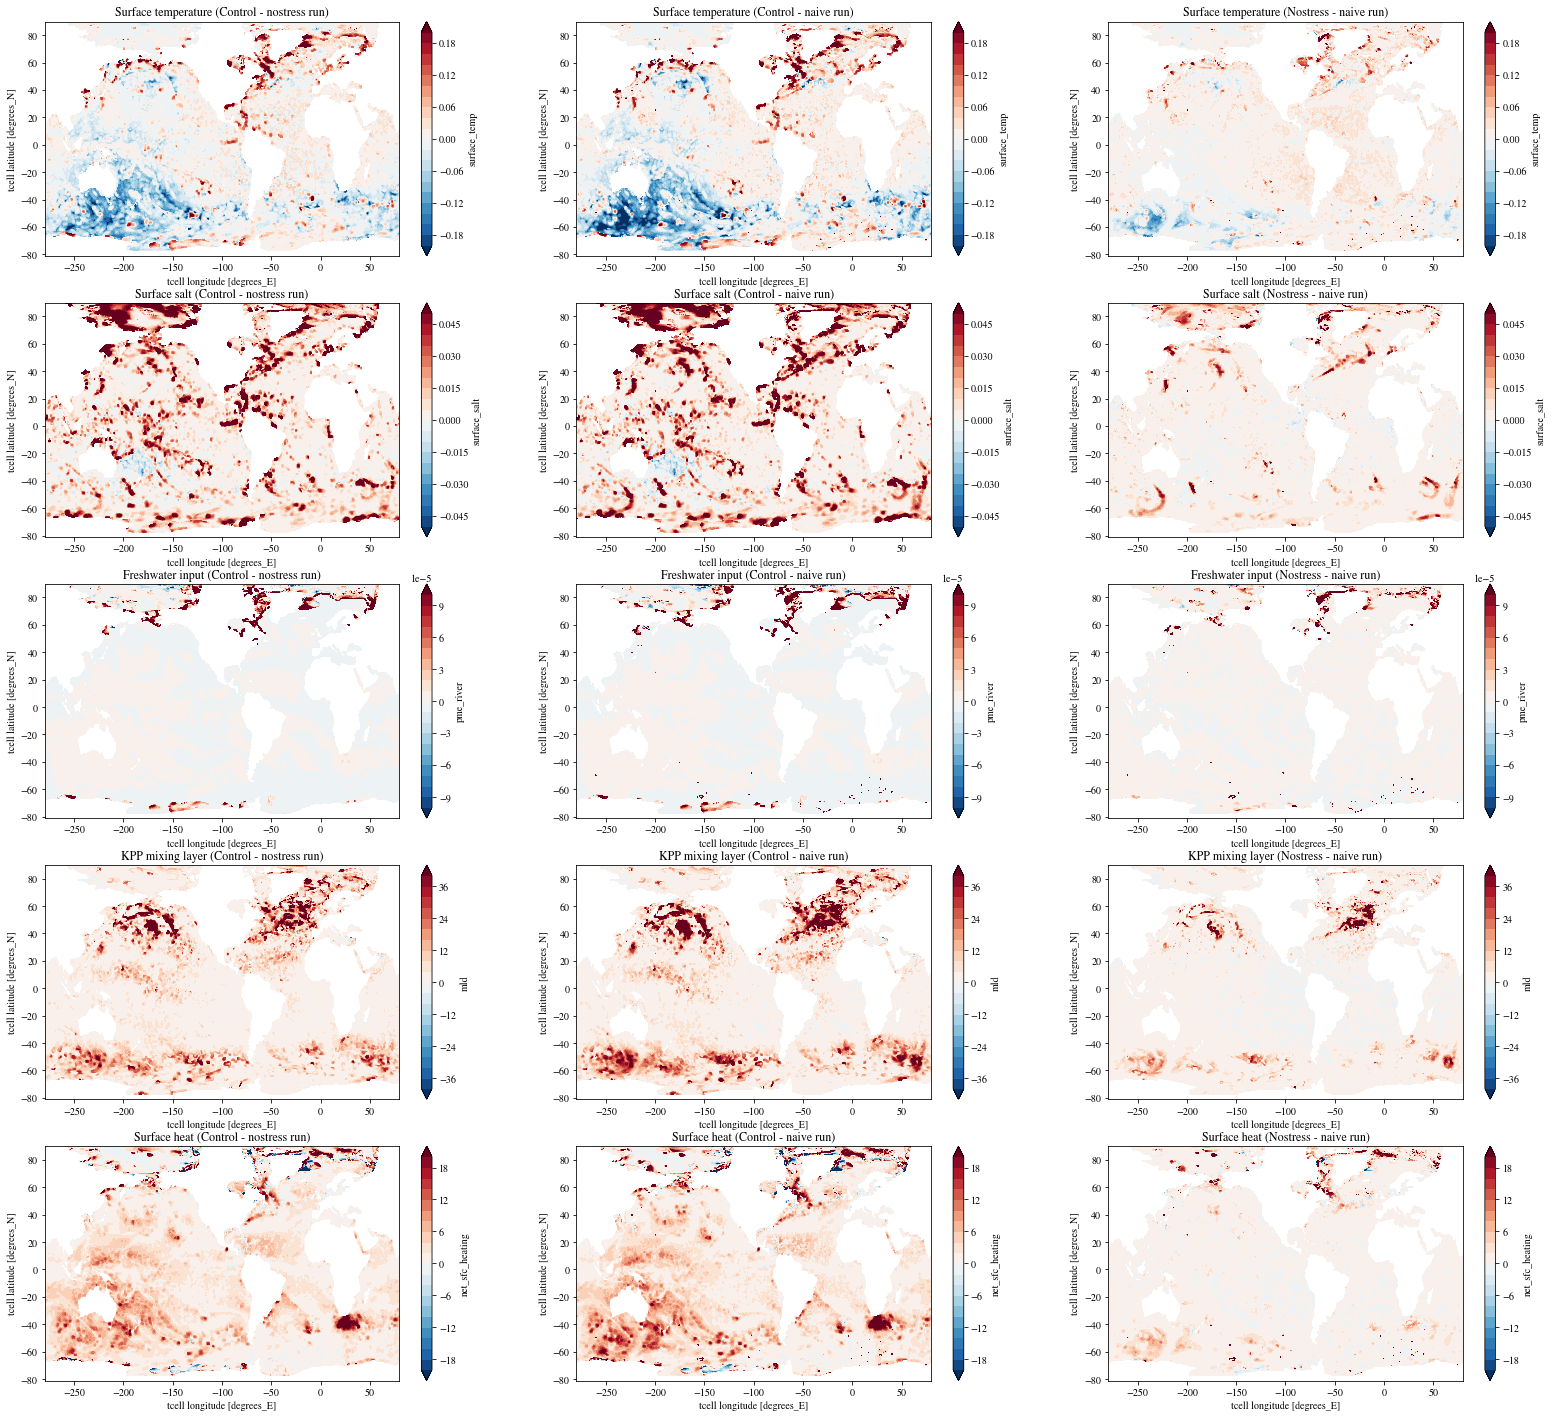

In [5]:
fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(27,25))

(temp_sfc_con - temp_sfc_buo).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.2,0.2,21))
axes[0][0].set_title('Surface temperature (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.2,0.2,21))
axes[0][1].set_title('Surface temperature (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-0.2,0.2,21))
axes[0][2].set_title('Surface temperature (Nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.05,0.05,21))
axes[1][0].set_title('Surface salt (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.05,0.05,21))
axes[1][1].set_title('Surface salt (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-0.05,0.05,21))
axes[1][2].set_title('Surface salt (Nostress - naive run)')

(pme_river_con - pme_river_buo).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-1e-6,1e-6,21))
axes[2][0].set_title('Freshwater input (Control - nostress run)')

(pme_river_con - pme_river_naive).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-1e-6,1e-6,21))
axes[2][1].set_title('Freshwater input (Control - naive run)')

(pme_river_buo - pme_river_naive).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-1e-6,1e-6,21))
axes[2][2].set_title('Freshwater input (Nostress - naive run)')

(hblt_con - hblt_buo).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-40,40,21))
axes[3][0].set_title('KPP mixing layer (Control - nostress run)')

(hblt_con - hblt_naive).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-40,40,21))
axes[3][1].set_title('KPP mixing layer (Control - naive run)')

(hblt_buo - hblt_naive).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-40,40,21))
axes[3][2].set_title('KPP mixing layer (Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-20,20,21))
axes[4][0].set_title('Surface heat (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-20,20,21))
axes[4][1].set_title('Surface heat (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-20,20,21))
axes[4][2].set_title('Surface heat (Nostress - naive run)')

## 2. Hourly Outputs

## Surface temperature

Text(0.5, 1.0, 'Surface temp 6th hour (Nostress - naive run)')

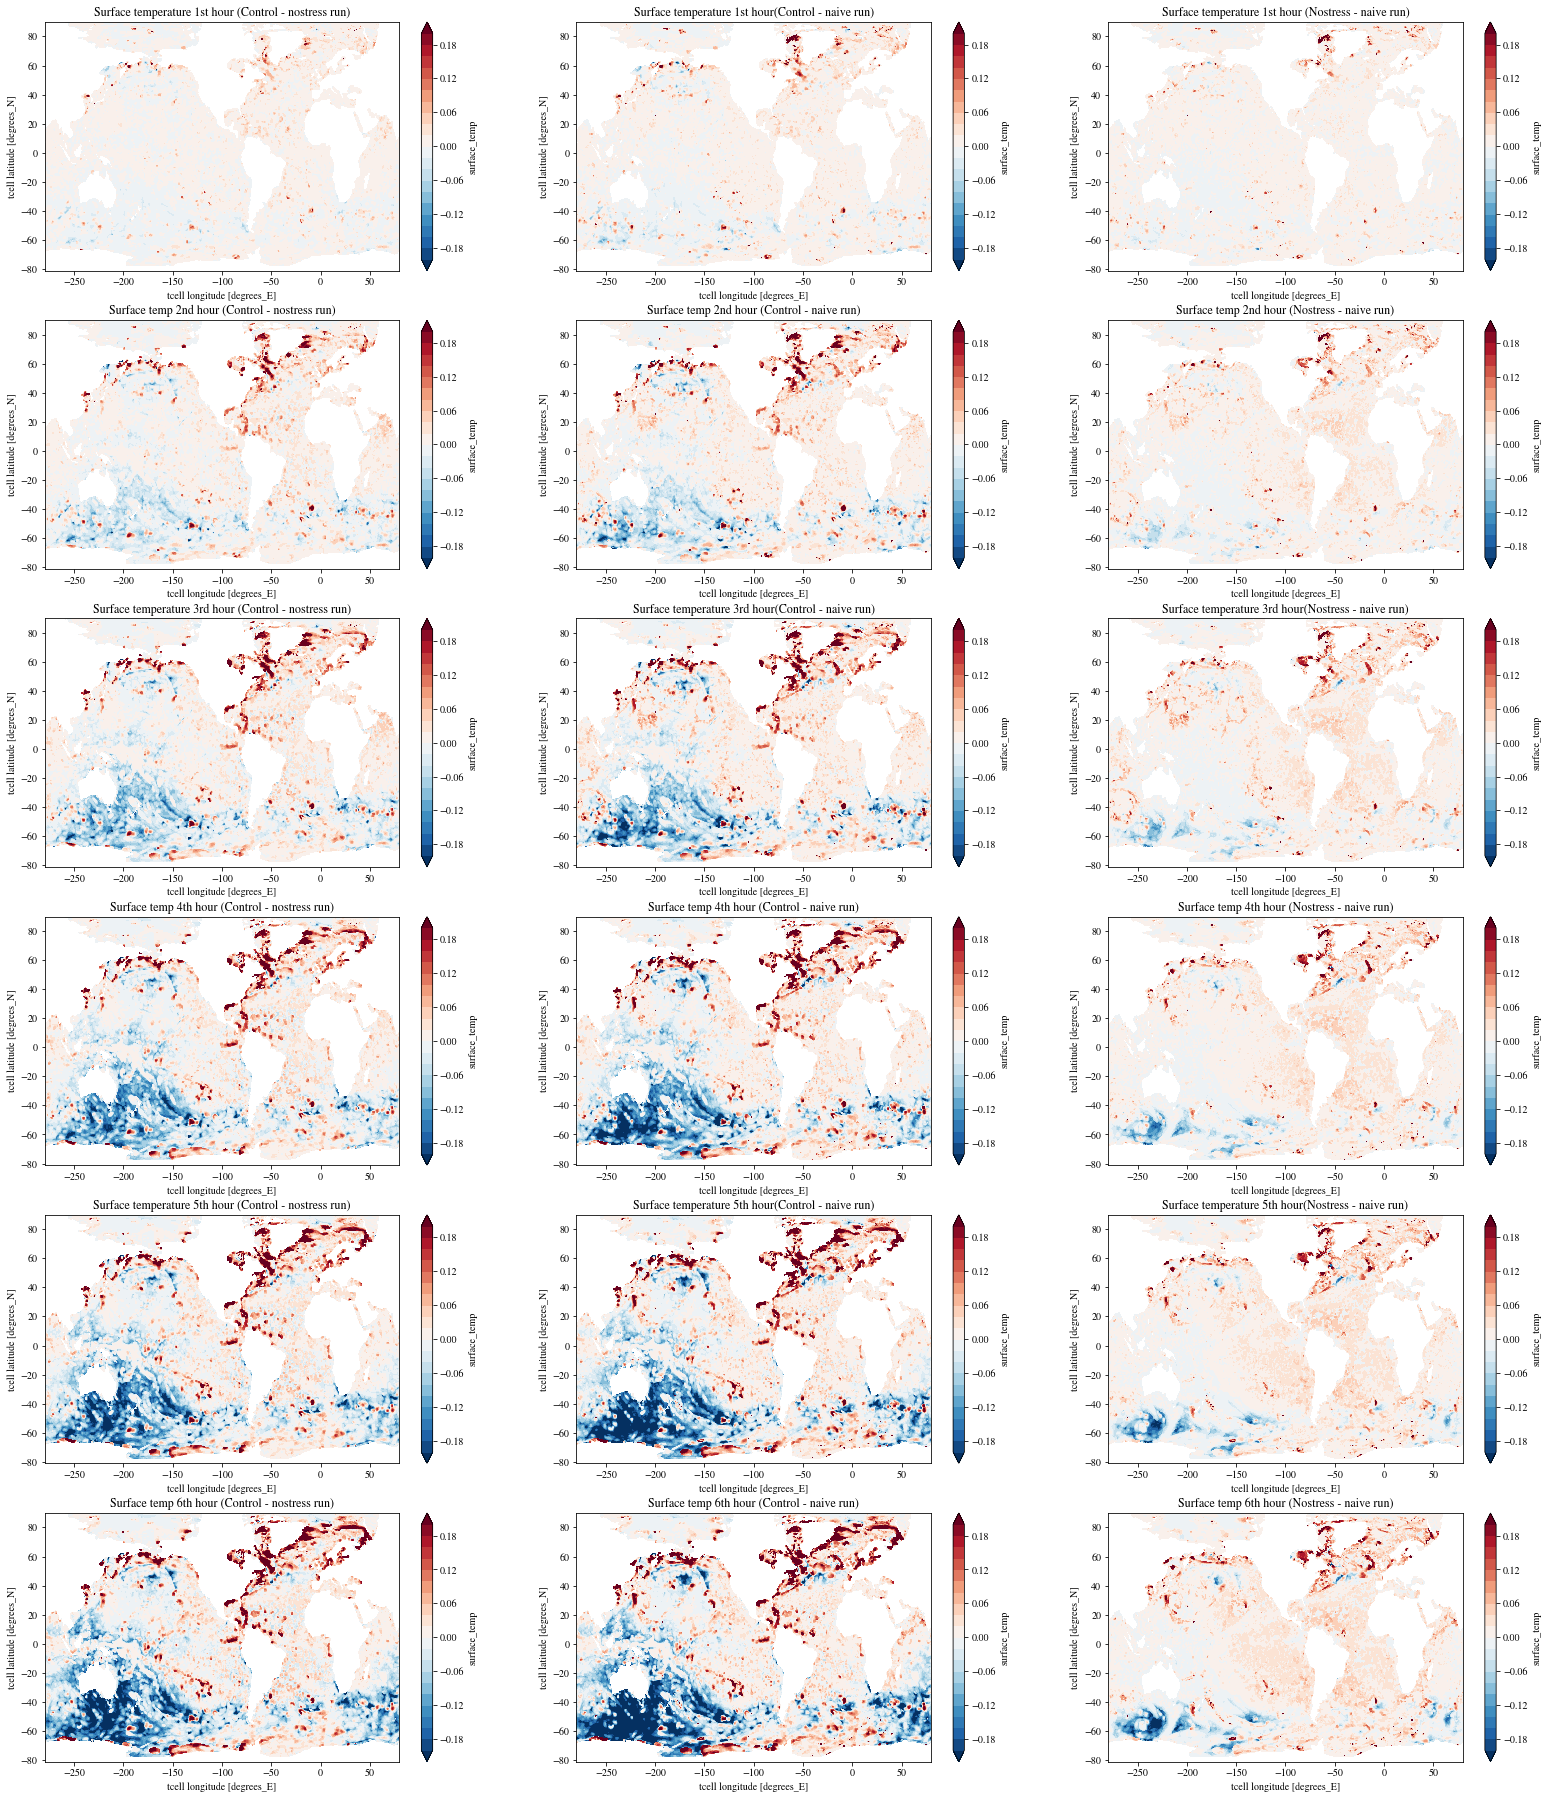

In [6]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,32))

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.2,0.2,21))
axes[0][0].set_title('Surface temperature 1st hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.2,0.2,21))
axes[0][1].set_title('Surface temperature 1st hour(Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-0.2,0.2,21))
axes[0][2].set_title('Surface temperature 1st hour (Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.2,0.2,21))
axes[1][0].set_title('Surface temp 2nd hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.2,0.2,21))
axes[1][1].set_title('Surface temp 2nd hour (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-0.2,0.2,21))
axes[1][2].set_title('Surface temp 2nd hour (Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-0.2,0.2,21))
axes[2][0].set_title('Surface temperature 3rd hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-0.2,0.2,21))
axes[2][1].set_title('Surface temperature 3rd hour(Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-0.2,0.2,21))
axes[2][2].set_title('Surface temperature 3rd hour(Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-0.2,0.2,21))
axes[3][0].set_title('Surface temp 4th hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-0.2,0.2,21))
axes[3][1].set_title('Surface temp 4th hour (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-0.2,0.2,21))
axes[3][2].set_title('Surface temp 4th hour (Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-0.2,0.2,21))
axes[4][0].set_title('Surface temperature 5th hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-0.2,0.2,21))
axes[4][1].set_title('Surface temperature 5th hour(Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-0.2,0.2,21))
axes[4][2].set_title('Surface temperature 5th hour(Nostress - naive run)')

(temp_sfc_con - temp_sfc_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-0.2,0.2,21))
axes[5][0].set_title('Surface temp 6th hour (Control - nostress run)')

(temp_sfc_con - temp_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-0.2,0.2,21))
axes[5][1].set_title('Surface temp 6th hour (Control - naive run)')

(temp_sfc_buo - temp_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-0.2,0.2,21))
axes[5][2].set_title('Surface temp 6th hour (Nostress - naive run)')

## Surface Salinity

Text(0.5, 1.0, 'Surface salinity 6th hour (nostress - naive run)')

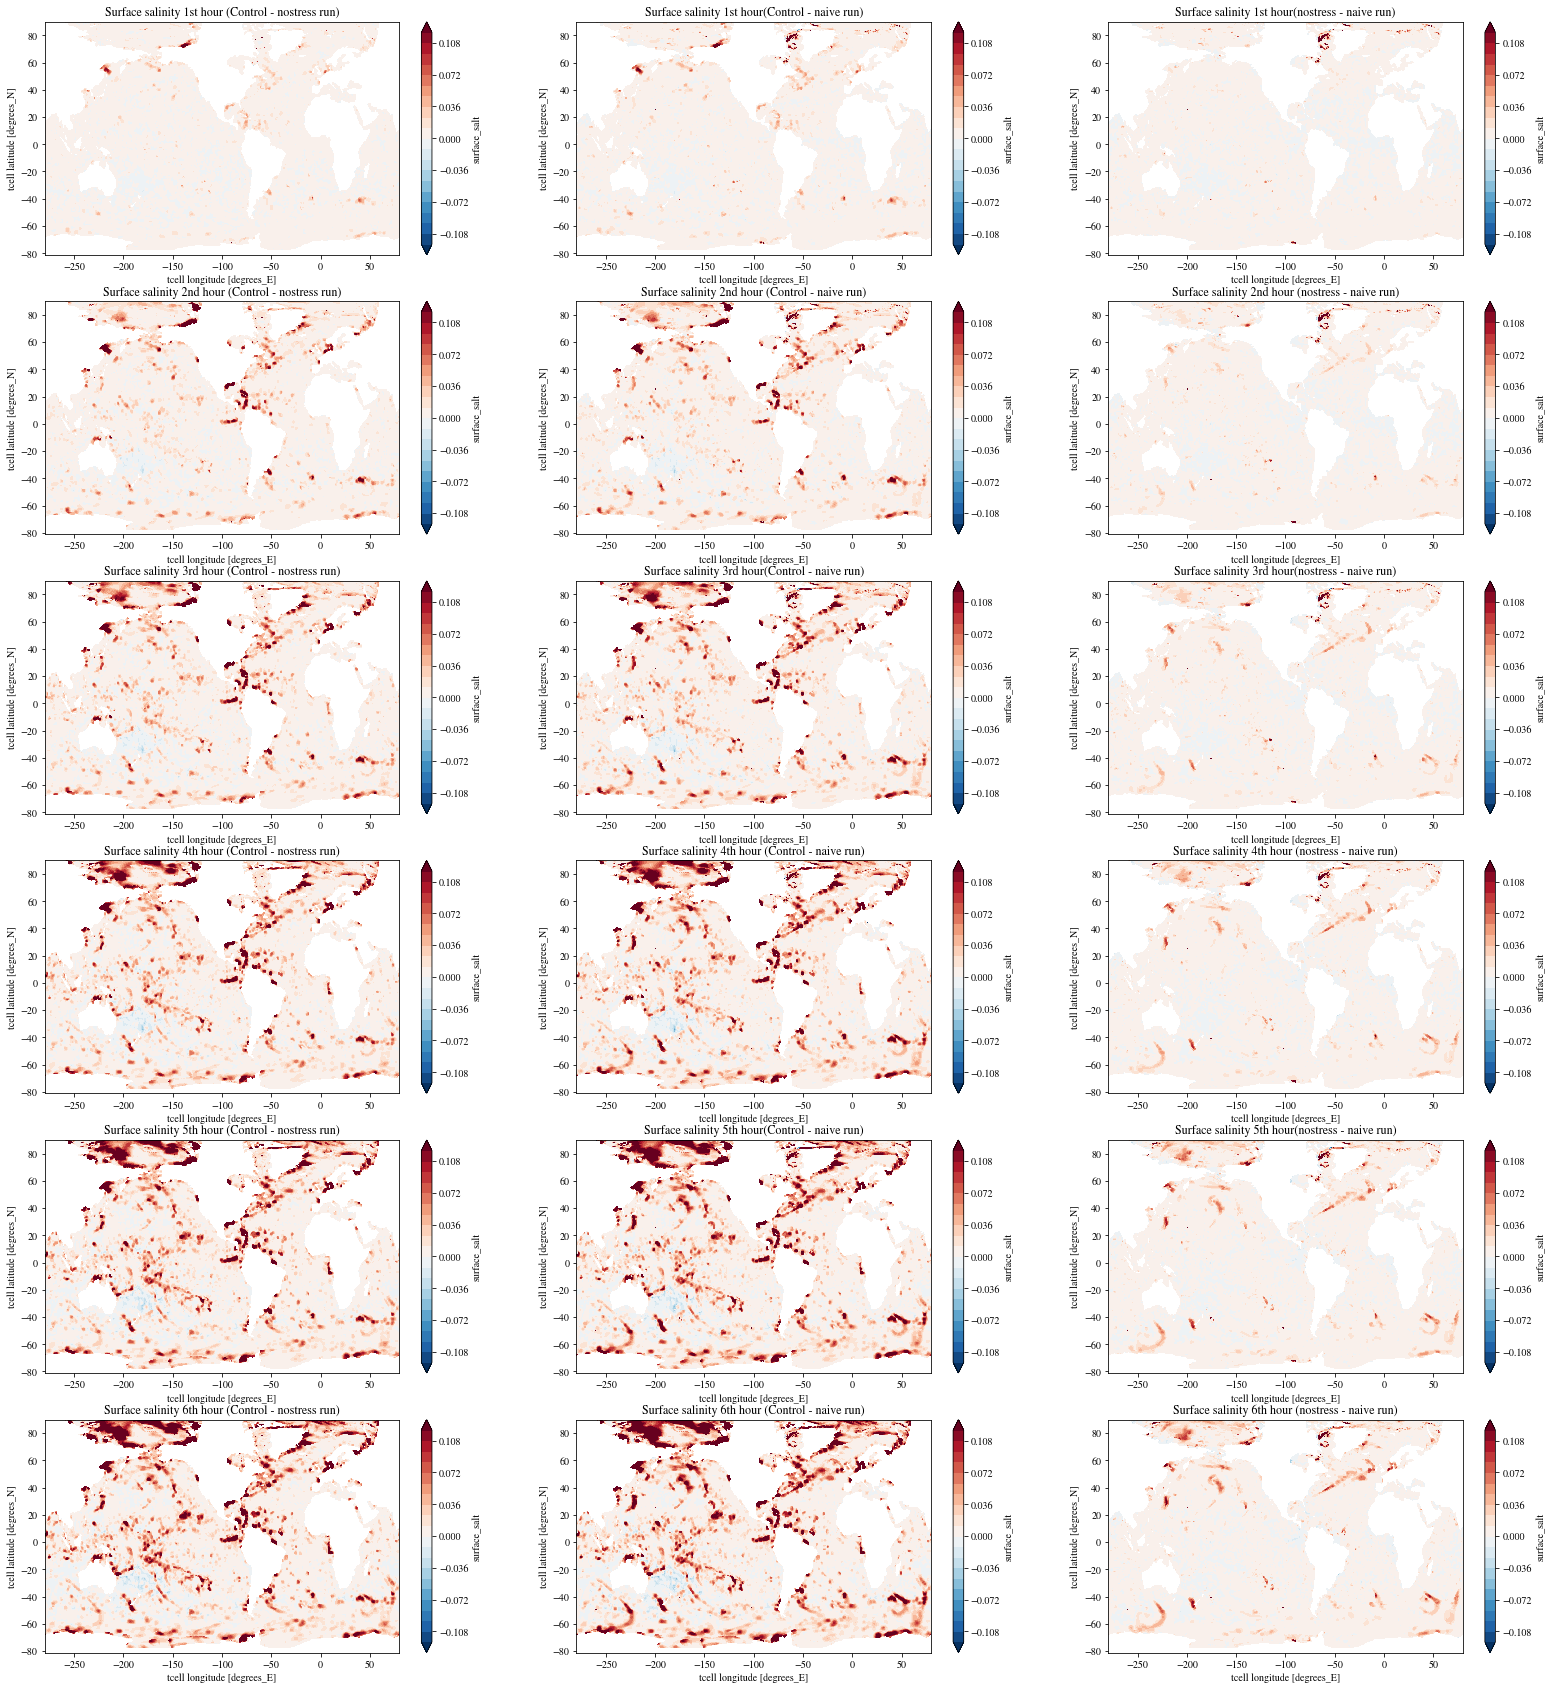

In [7]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0.12,0.12,21))
axes[0][0].set_title('Surface salinity 1st hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-0.12,0.12,21))
axes[0][1].set_title('Surface salinity 1st hour(Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-0.12,0.12,21))
axes[0][2].set_title('Surface salinity 1st hour(nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-0.12,0.12,21))
axes[1][0].set_title('Surface salinity 2nd hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-0.12,0.12,21))
axes[1][1].set_title('Surface salinity 2nd hour (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-0.12,0.12,21))
axes[1][2].set_title('Surface salinity 2nd hour (nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-0.12,0.12,21))
axes[2][0].set_title('Surface salinity 3rd hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-0.12,0.12,21))
axes[2][1].set_title('Surface salinity 3rd hour(Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-0.12,0.12,21))
axes[2][2].set_title('Surface salinity 3rd hour(nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-0.12,0.12,21))
axes[3][0].set_title('Surface salinity 4th hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-0.12,0.12,21))
axes[3][1].set_title('Surface salinity 4th hour (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-0.12,0.12,21))
axes[3][2].set_title('Surface salinity 4th hour (nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-0.12,0.12,21))
axes[4][0].set_title('Surface salinity 5th hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-0.12,0.12,21))
axes[4][1].set_title('Surface salinity 5th hour(Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-0.12,0.12,21))
axes[4][2].set_title('Surface salinity 5th hour(nostress - naive run)')

(salt_sfc_con - salt_sfc_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-0.12,0.12,21))
axes[5][0].set_title('Surface salinity 6th hour (Control - nostress run)')

(salt_sfc_con - salt_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-0.12,0.12,21))
axes[5][1].set_title('Surface salinity 6th hour (Control - naive run)')

(salt_sfc_buo - salt_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-0.12,0.12,21))
axes[5][2].set_title('Surface salinity 6th hour (nostress - naive run)')

## Freshwater input

Text(0.5, 1.0, 'Freshwater input 6th hour (Nostress - naive run)')

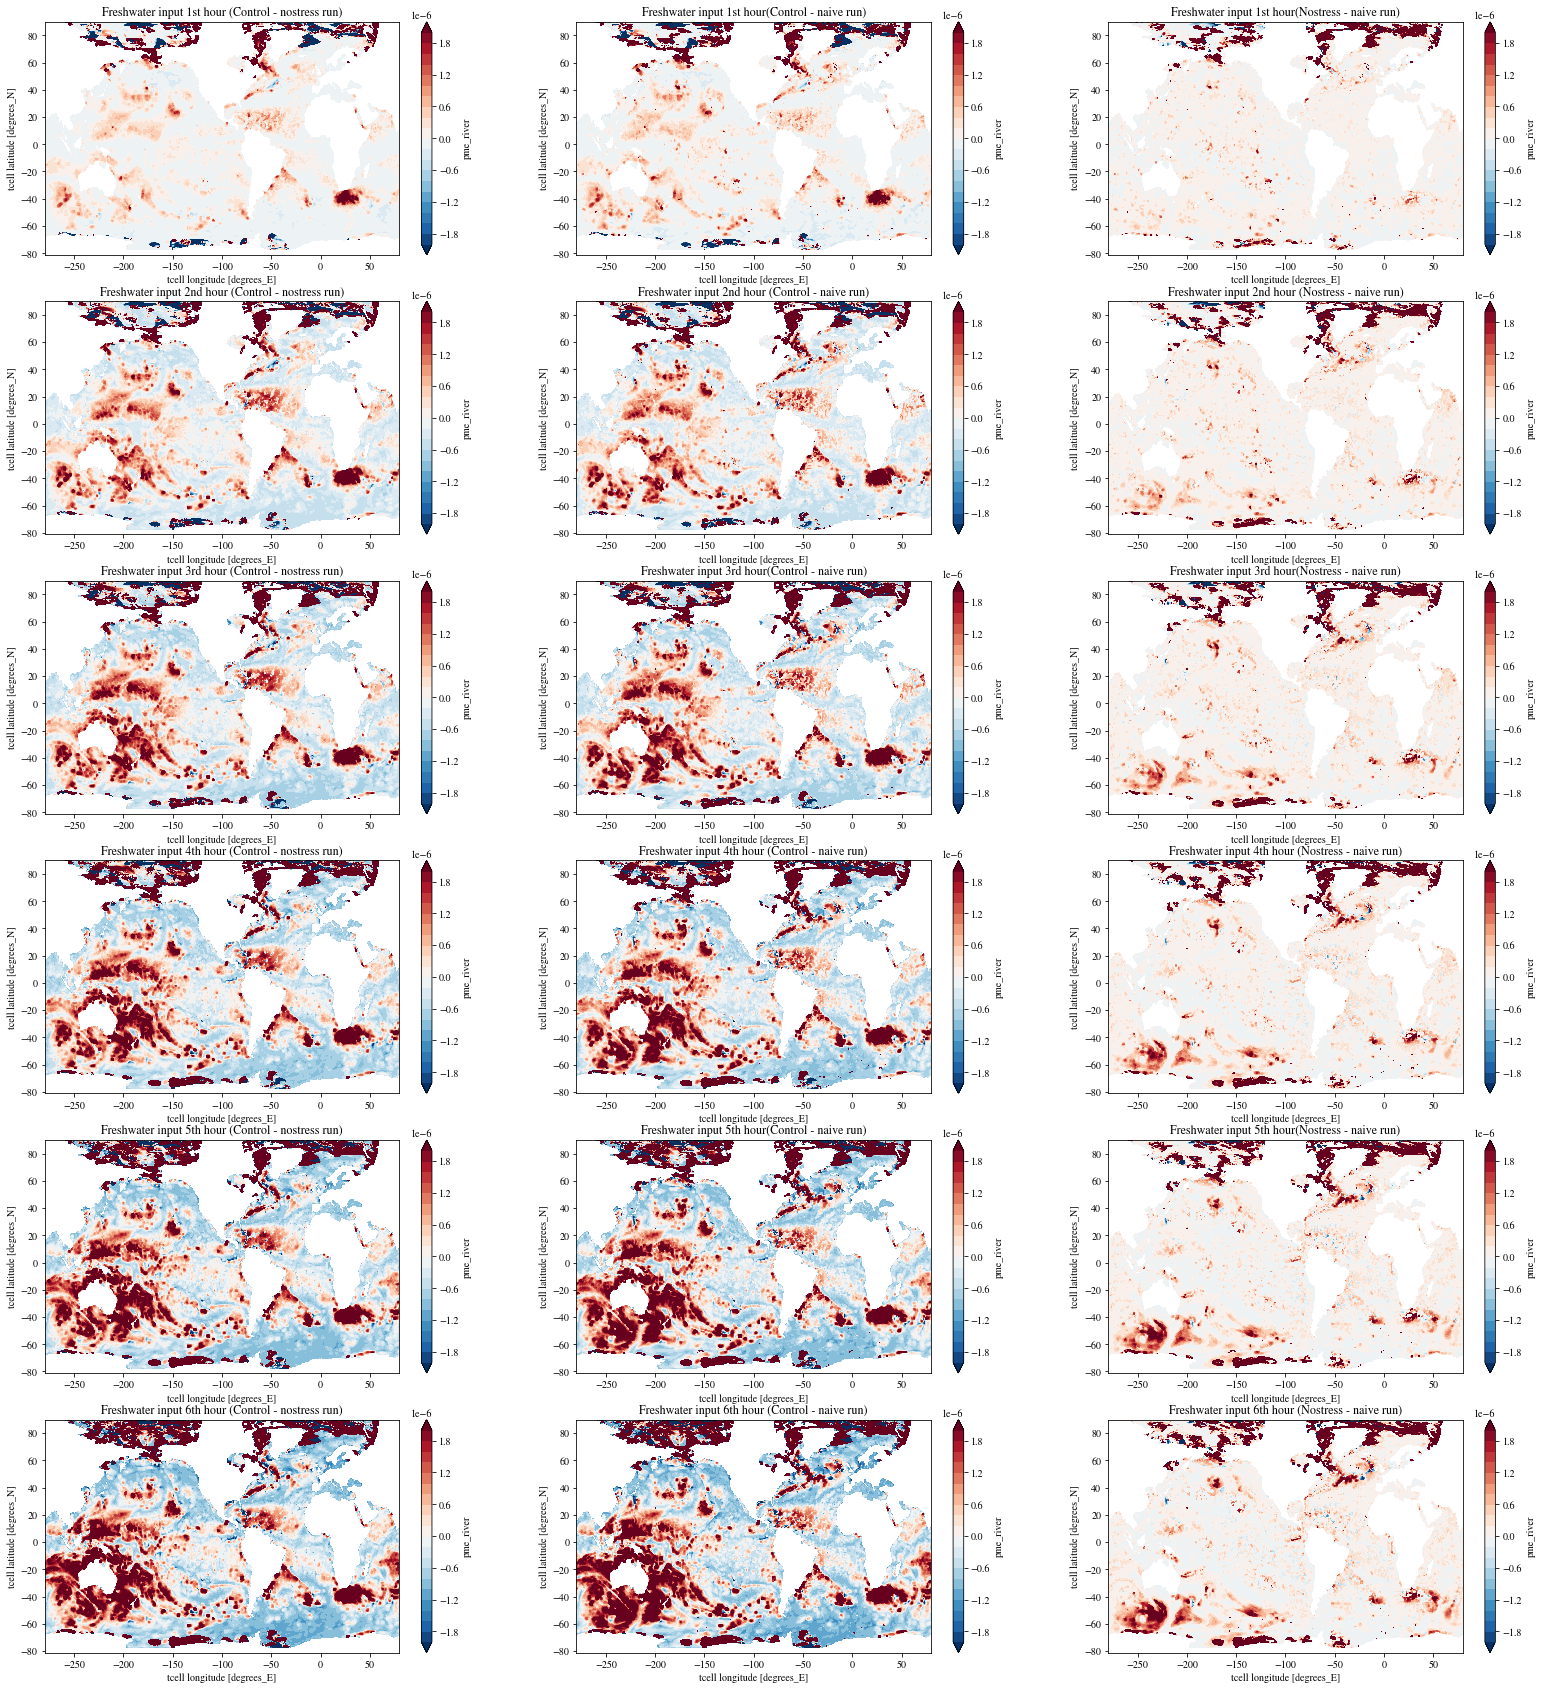

In [8]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-2e-6,2e-6,21))
axes[0][0].set_title('Freshwater input 1st hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-2e-6,2e-6,21))
axes[0][1].set_title('Freshwater input 1st hour(Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-2e-6,2e-6,21))
axes[0][2].set_title('Freshwater input 1st hour(Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-2e-6,2e-6,21))
axes[1][0].set_title('Freshwater input 2nd hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-2e-6,2e-6,21))
axes[1][1].set_title('Freshwater input 2nd hour (Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-2e-6,2e-6,21))
axes[1][2].set_title('Freshwater input 2nd hour (Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-2e-6,2e-6,21))
axes[2][0].set_title('Freshwater input 3rd hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-2e-6,2e-6,21))
axes[2][1].set_title('Freshwater input 3rd hour(Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-2e-6,2e-6,21))
axes[2][2].set_title('Freshwater input 3rd hour(Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-2e-6,2e-6,21))
axes[3][0].set_title('Freshwater input 4th hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-2e-6,2e-6,21))
axes[3][1].set_title('Freshwater input 4th hour (Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-2e-6,2e-6,21))
axes[3][2].set_title('Freshwater input 4th hour (Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-2e-6,2e-6,21))
axes[4][0].set_title('Freshwater input 5th hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-2e-6,2e-6,21))
axes[4][1].set_title('Freshwater input 5th hour(Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-2e-6,2e-6,21))
axes[4][2].set_title('Freshwater input 5th hour(Nostress - naive run)')

(pme_river_con - pme_river_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-2e-6,2e-6,21))
axes[5][0].set_title('Freshwater input 6th hour (Control - nostress run)')

(pme_river_con - pme_river_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-2e-6,2e-6,21))
axes[5][1].set_title('Freshwater input 6th hour (Control - naive run)')

(pme_river_buo - pme_river_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-2e-6,2e-6,21))
axes[5][2].set_title('Freshwater input 6th hour (Nostress - naive run)')

## KPP Mixing Layer

Text(0.5, 1.0, 'KPP mixing layer 6th hour (Nostress - naive run)')

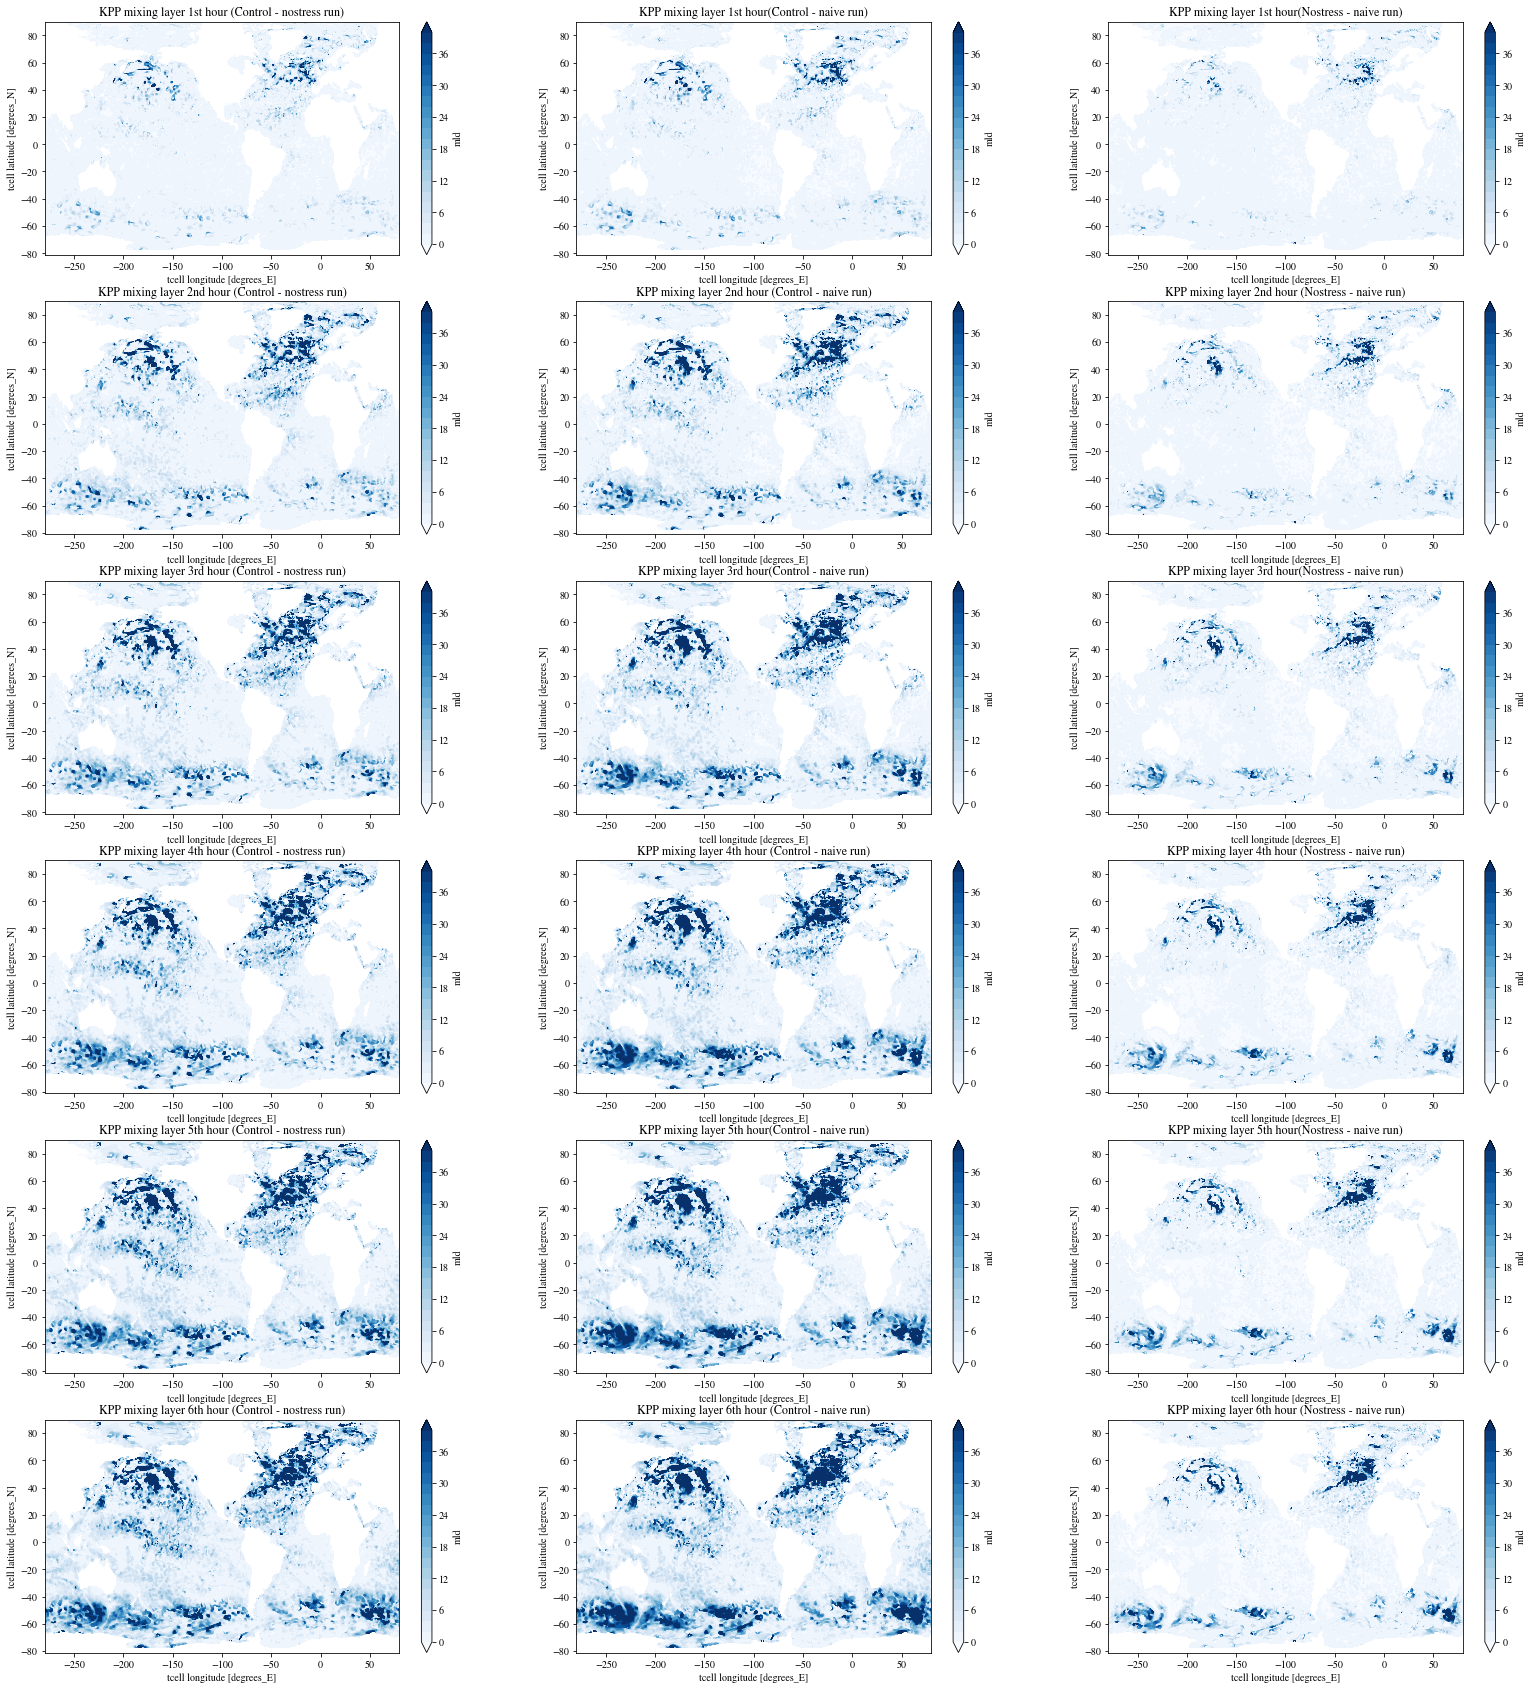

In [9]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-0,40,21),cmap = 'Blues')
axes[0][0].set_title('KPP mixing layer 1st hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[0][1].set_title('KPP mixing layer 1st hour(Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[0][2].set_title('KPP mixing layer 1st hour(Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[1][0].set_title('KPP mixing layer 2nd hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[1][1].set_title('KPP mixing layer 2nd hour (Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[1][2].set_title('KPP mixing layer 2nd hour (Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[2][0].set_title('KPP mixing layer 3rd hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[2][1].set_title('KPP mixing layer 3rd hour(Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[2][2].set_title('KPP mixing layer 3rd hour(Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[3][0].set_title('KPP mixing layer 4th hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[3][1].set_title('KPP mixing layer 4th hour (Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[3][2].set_title('KPP mixing layer 4th hour (Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[4][0].set_title('KPP mixing layer 5th hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[4][1].set_title('KPP mixing layer 5th hour(Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[4][2].set_title('KPP mixing layer 5th hour(Nostress - naive run)')

(hblt_con - hblt_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[5][0].set_title('KPP mixing layer 6th hour (Control - nostress run)')

(hblt_con - hblt_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[5][1].set_title('KPP mixing layer 6th hour (Control - naive run)')

(hblt_buo - hblt_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(0,40,21),cmap = 'Blues')
axes[5][2].set_title('KPP mixing layer 6th hour (Nostress - naive run)')

## Surface heat flux

Text(0.5, 1.0, 'Surface heat flux 6th hour (Nostress - naive run)')

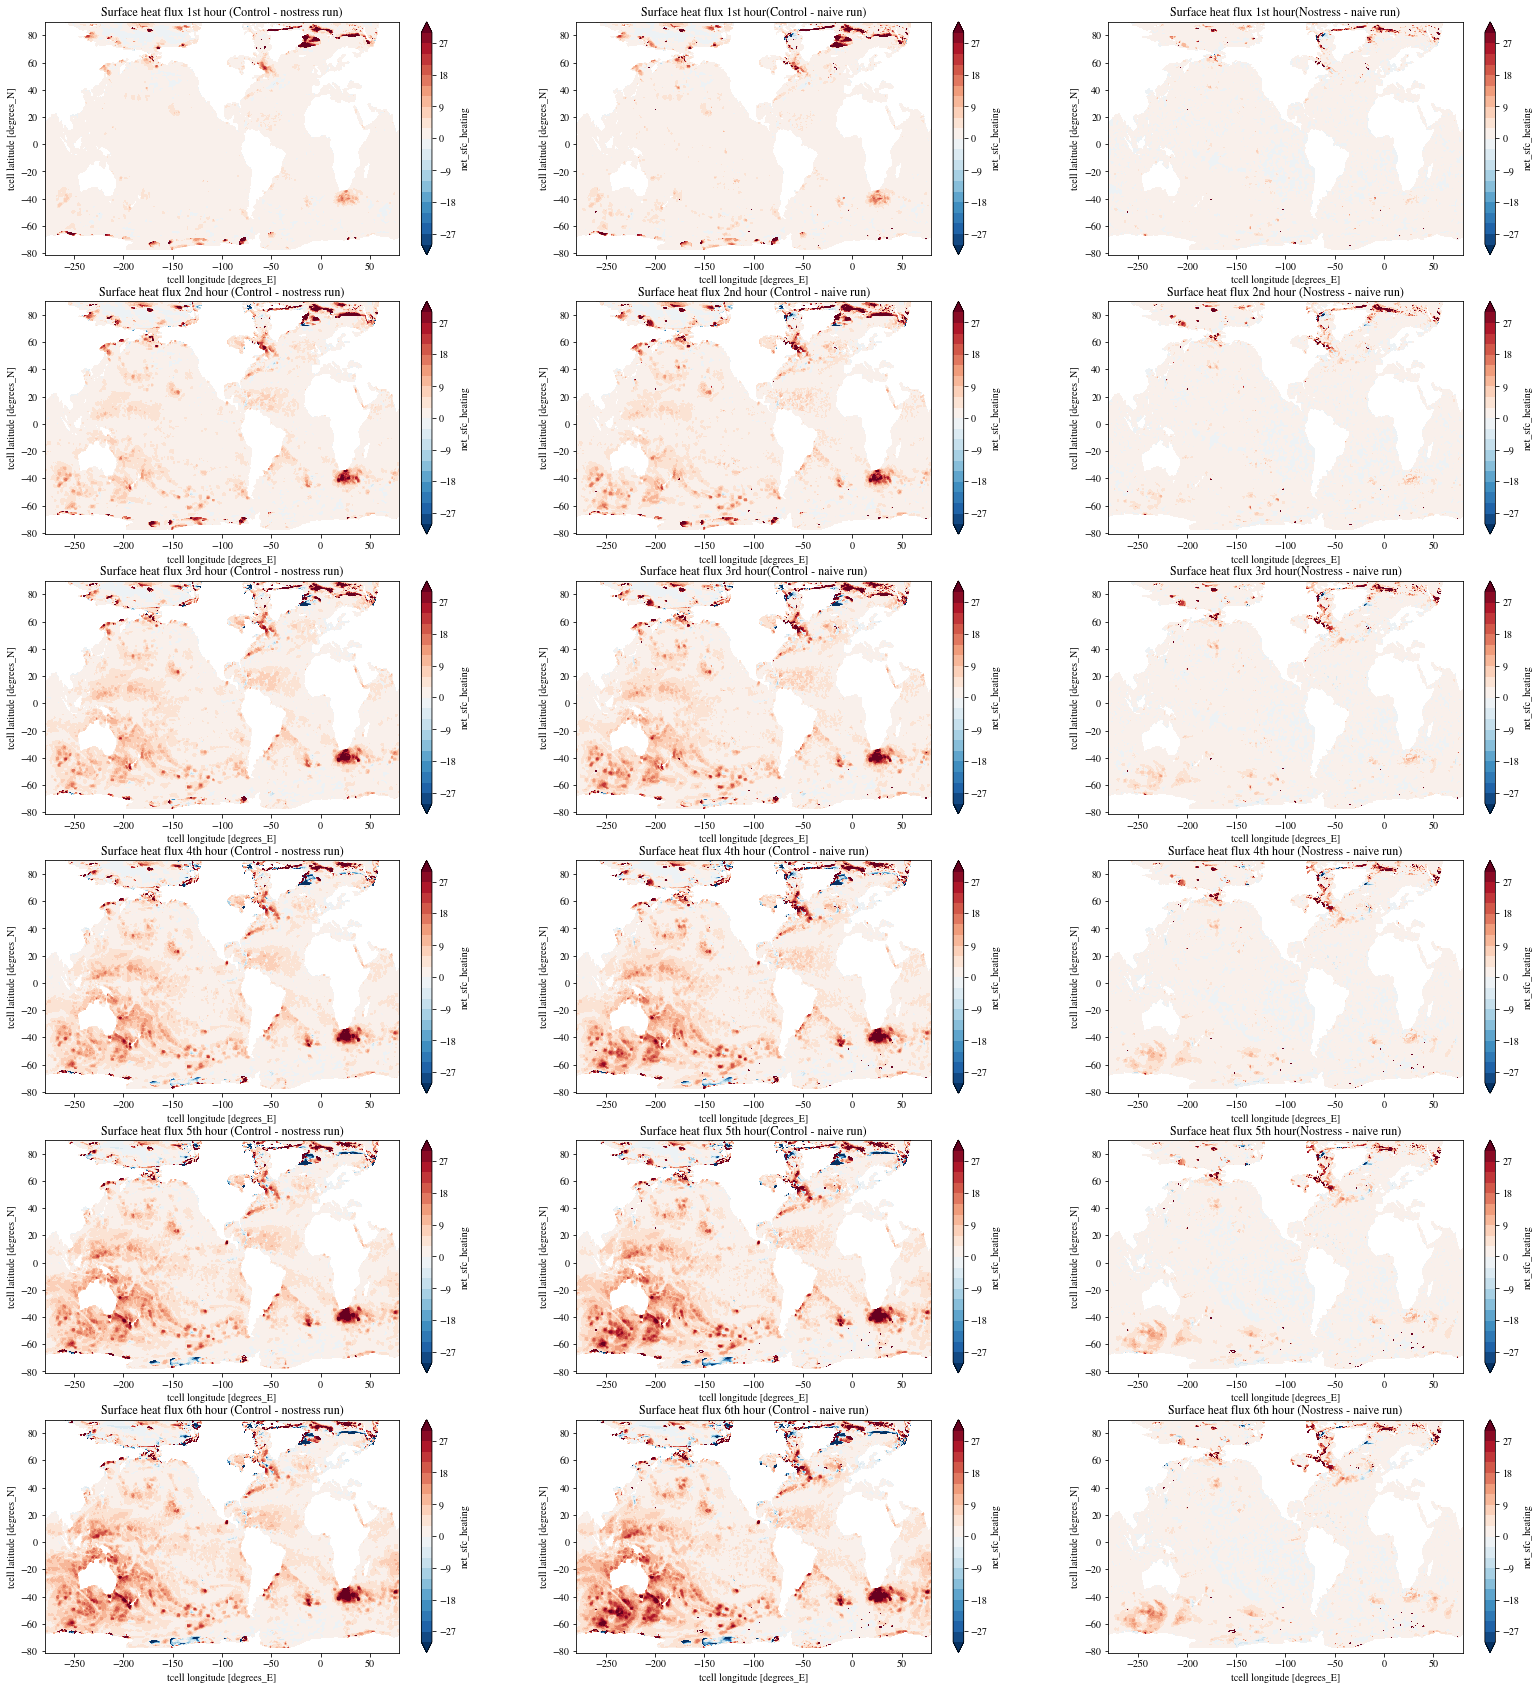

In [10]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(27,30))

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-30,30,21))
axes[0][0].set_title('Surface heat flux 1st hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-30,30,21))
axes[0][1].set_title('Surface heat flux 1st hour(Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 00:00:00','1900-01-01 01:00:00')).mean('time').plot.contourf(ax = axes[0][2],levels = np.linspace(-30,30,21))
axes[0][2].set_title('Surface heat flux 1st hour(Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-30,30,21))
axes[1][0].set_title('Surface heat flux 2nd hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-30,30,21))
axes[1][1].set_title('Surface heat flux 2nd hour (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 01:00:00','1900-01-01 02:00:00')).mean('time').plot.contourf(ax = axes[1][2],levels = np.linspace(-30,30,21))
axes[1][2].set_title('Surface heat flux 2nd hour (Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-30,30,21))
axes[2][0].set_title('Surface heat flux 3rd hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-30,30,21))
axes[2][1].set_title('Surface heat flux 3rd hour(Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 02:00:00','1900-01-01 03:00:00')).mean('time').plot.contourf(ax = axes[2][2],levels = np.linspace(-30,30,21))
axes[2][2].set_title('Surface heat flux 3rd hour(Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-30,30,21))
axes[3][0].set_title('Surface heat flux 4th hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][1],levels = np.linspace(-30,30,21))
axes[3][1].set_title('Surface heat flux 4th hour (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 03:00:00','1900-01-01 04:00:00')).mean('time').plot.contourf(ax = axes[3][2],levels = np.linspace(-30,30,21))
axes[3][2].set_title('Surface heat flux 4th hour (Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][0],levels = np.linspace(-30,30,21))
axes[4][0].set_title('Surface heat flux 5th hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][1],levels = np.linspace(-30,30,21))
axes[4][1].set_title('Surface heat flux 5th hour(Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 04:00:00','1900-01-01 05:00:00')).mean('time').plot.contourf(ax = axes[4][2],levels = np.linspace(-30,30,21))
axes[4][2].set_title('Surface heat flux 5th hour(Nostress - naive run)')

(heat_sfc_con - heat_sfc_buo).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][0],levels = np.linspace(-30,30,21))
axes[5][0].set_title('Surface heat flux 6th hour (Control - nostress run)')

(heat_sfc_con - heat_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][1],levels = np.linspace(-30,30,21))
axes[5][1].set_title('Surface heat flux 6th hour (Control - naive run)')

(heat_sfc_buo - heat_sfc_naive).sel(time = slice('1900-01-01 05:00:00','1900-01-01 06:00:00')).mean('time').plot.contourf(ax = axes[5][2],levels = np.linspace(-30,30,21))
axes[5][2].set_title('Surface heat flux 6th hour (Nostress - naive run)')

## 3. Time Series analysis (for North Atlantic, North Pacific and South Pacific regions)

### A. North Atlantic

#### (i) KPP Mixing Layer

In [11]:
area_t = cc.querying.getvar(expt=expt[0], variable='area_t', session=session, frequency='static', n=1)
area_t_NA = area_t.sel(xt_ocean = slice(-90,10)).sel(yt_ocean = slice(10,65))
area_cor_NA = (xr.ufuncs.isfinite(hblt_con)*area_t_NA).mean('time')

In [12]:
hblt_avg_con_NA = (hblt_con*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_buo_NA = (hblt_buo*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_naive_NA = (hblt_naive*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])

#### (ii) Surface temperature

In [13]:
temp_avg_con_NA = (temp_sfc_con*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_buo_NA = (temp_sfc_buo*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_naive_NA = (temp_sfc_naive*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])

#### Surface salinity

In [14]:
salt_avg_con_NA = (salt_sfc_con*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_buo_NA = (salt_sfc_buo*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_naive_NA = (salt_sfc_naive*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])

#### Freshwater flux

In [15]:
pme_river_avg_con_NA = (pme_river_con*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_buo_NA = (pme_river_buo*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_naive_NA = (pme_river_naive*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])

#### Surface heat flux

In [16]:
heat_sfc_avg_con_NA = (heat_sfc_con*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_buo_NA = (heat_sfc_buo*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_naive_NA = (heat_sfc_naive*area_cor_NA).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NA.sum(dim = ['yt_ocean','xt_ocean'])

### 2. North Pacific

#### (i) KPP mixing layer

In [17]:
area_t_NP = area_t.sel(xt_ocean = slice(-250,-100)).sel(yt_ocean = slice(10,65))
area_cor_NP = (xr.ufuncs.isfinite(hblt_con)*area_t_NP).mean('time')

In [18]:
hblt_avg_con_NP = (hblt_con*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_buo_NP = (hblt_buo*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_naive_NP = (hblt_naive*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])

#### (ii) Surface temperature

In [19]:
temp_avg_con_NP = (temp_sfc_con*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_buo_NP = (temp_sfc_buo*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_naive_NP = (temp_sfc_naive*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])

#### (iii) Surface salinity

In [20]:
salt_avg_con_NP = (salt_sfc_con*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_buo_NP = (salt_sfc_buo*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_naive_NP = (salt_sfc_naive*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])

#### (iv) Freshwater input

In [21]:
pme_river_avg_con_NP = (pme_river_con*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_buo_NP = (pme_river_buo*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_t_NP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_naive_NP = (pme_river_naive*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])

#### (v) Surface heat flux

In [22]:
heat_sfc_avg_con_NP = (heat_sfc_con*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_buo_NP = (heat_sfc_buo*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_naive_NP = (heat_sfc_naive*area_cor_NP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_NP.sum(dim = ['yt_ocean','xt_ocean'])

## 3. South Pacific

In [23]:
area_t_SP = area_t.sel(xt_ocean = slice(-250,-80)).sel(yt_ocean = slice(-65,-10))
area_cor_SP = (xr.ufuncs.isfinite(hblt_con)*area_t_SP).mean('time')

#### (i) KPP mixing layer

In [24]:
hblt_avg_con_SP = (hblt_con*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_buo_SP = (hblt_buo*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
hblt_avg_naive_SP = (hblt_naive*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])

#### (ii) Surface temperature

In [25]:
temp_avg_con_SP = (temp_sfc_con*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_buo_SP = (temp_sfc_buo*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
temp_avg_naive_SP = (temp_sfc_naive*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])

#### (iii) Surface salinity

In [26]:
salt_avg_con_SP = (salt_sfc_con*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_buo_SP = (salt_sfc_buo*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
salt_avg_naive_SP = (salt_sfc_naive*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])

#### (iv) Freshwater input

In [27]:
pme_river_avg_con_SP = (pme_river_con*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_buo_SP = (pme_river_buo*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
pme_river_avg_naive_SP = (pme_river_naive*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])

#### (v) Surface heat flux

In [28]:
heat_sfc_avg_con_SP = (heat_sfc_con*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_buo_SP = (heat_sfc_buo*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])
heat_sfc_avg_naive_SP = (heat_sfc_naive*area_cor_SP).sum(dim = ['yt_ocean','xt_ocean'])/area_cor_SP.sum(dim = ['yt_ocean','xt_ocean'])

## Time series plots

Text(0.5, 1.0, 'Surface heat flux - SP')

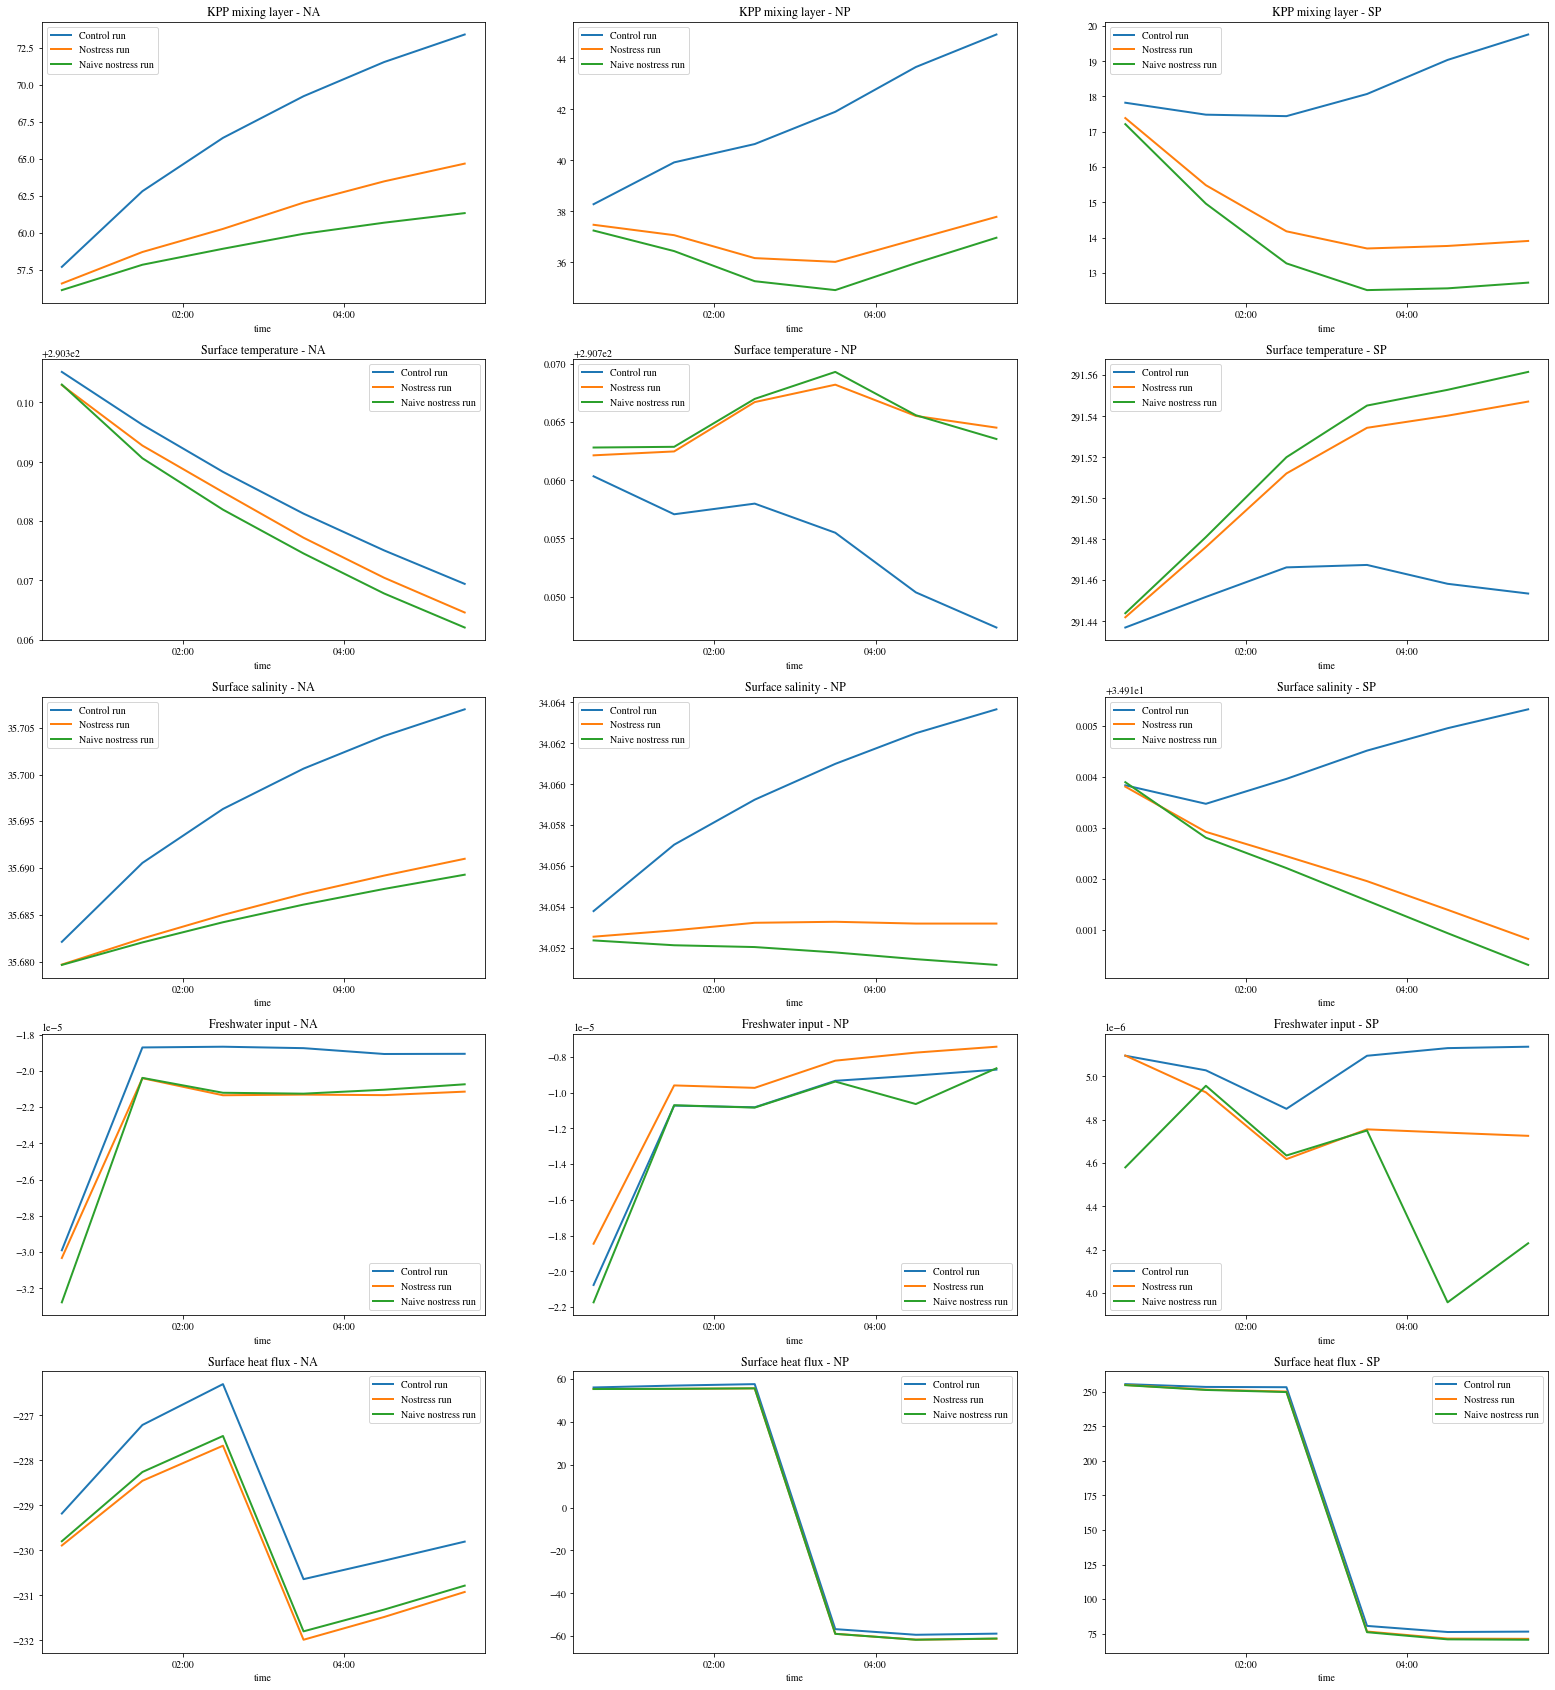

In [29]:
fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(27,30))

hblt_avg_con_NA.plot(ax = axes[0][0],label = 'Control run')
hblt_avg_buo_NA.plot(ax = axes[0][0],label = 'Nostress run')
hblt_avg_naive_NA.plot(ax = axes[0][0],label = 'Naive nostress run')
axes[0][0].legend()
axes[0][0].set_title('KPP mixing layer - NA')

temp_avg_con_NA.plot(ax = axes[1][0],label = 'Control run')
temp_avg_buo_NA.plot(ax = axes[1][0],label = 'Nostress run')
temp_avg_naive_NA.plot(ax = axes[1][0],label = 'Naive nostress run')
axes[1][0].legend()
axes[1][0].set_title('Surface temperature - NA')

salt_avg_con_NA.plot(ax = axes[2][0],label = 'Control run')
salt_avg_buo_NA.plot(ax = axes[2][0],label = 'Nostress run')
salt_avg_naive_NA.plot(ax = axes[2][0],label = 'Naive nostress run')
axes[2][0].legend()
axes[2][0].set_title('Surface salinity - NA')

pme_river_avg_con_NA.plot(ax = axes[3][0],label = 'Control run')
pme_river_avg_buo_NA.plot(ax = axes[3][0],label = 'Nostress run')
pme_river_avg_naive_NA.plot(ax = axes[3][0],label = 'Naive nostress run')
axes[3][0].legend()
axes[3][0].set_title('Freshwater input - NA')

heat_sfc_avg_con_NA.plot(ax = axes[4][0],label = 'Control run')
heat_sfc_avg_buo_NA.plot(ax = axes[4][0],label = 'Nostress run')
heat_sfc_avg_naive_NA.plot(ax = axes[4][0],label = 'Naive nostress run')
axes[4][0].legend()
axes[4][0].set_title('Surface heat flux - NA')

hblt_avg_con_NP.plot(ax = axes[0][1],label = 'Control run')
hblt_avg_buo_NP.plot(ax = axes[0][1],label = 'Nostress run')
hblt_avg_naive_NP.plot(ax = axes[0][1],label = 'Naive nostress run')
axes[0][1].legend()
axes[0][1].set_title('KPP mixing layer - NP')

temp_avg_con_NP.plot(ax = axes[1][1],label = 'Control run')
temp_avg_buo_NP.plot(ax = axes[1][1],label = 'Nostress run')
temp_avg_naive_NP.plot(ax = axes[1][1],label = 'Naive nostress run')
axes[1][1].legend()
axes[1][1].set_title('Surface temperature - NP')

salt_avg_con_NP.plot(ax = axes[2][1],label = 'Control run')
salt_avg_buo_NP.plot(ax = axes[2][1],label = 'Nostress run')
salt_avg_naive_NP.plot(ax = axes[2][1],label = 'Naive nostress run')
axes[2][1].legend()
axes[2][1].set_title('Surface salinity - NP')

pme_river_avg_con_NP.plot(ax = axes[3][1],label = 'Control run')
pme_river_avg_buo_NP.plot(ax = axes[3][1],label = 'Nostress run')
pme_river_avg_naive_NP.plot(ax = axes[3][1],label = 'Naive nostress run')
axes[3][1].legend()
axes[3][1].set_title('Freshwater input - NP')

heat_sfc_avg_con_NP.plot(ax = axes[4][1],label = 'Control run')
heat_sfc_avg_buo_NP.plot(ax = axes[4][1],label = 'Nostress run')
heat_sfc_avg_naive_NP.plot(ax = axes[4][1],label = 'Naive nostress run')
axes[4][1].legend()
axes[4][1].set_title('Surface heat flux - NP')

hblt_avg_con_SP.plot(ax = axes[0][2],label = 'Control run')
hblt_avg_buo_SP.plot(ax = axes[0][2],label = 'Nostress run')
hblt_avg_naive_SP.plot(ax = axes[0][2],label = 'Naive nostress run')
axes[0][2].legend()
axes[0][2].set_title('KPP mixing layer - SP')

temp_avg_con_SP.plot(ax = axes[1][2],label = 'Control run')
temp_avg_buo_SP.plot(ax = axes[1][2],label = 'Nostress run')
temp_avg_naive_SP.plot(ax = axes[1][2],label = 'Naive nostress run')
axes[1][2].legend()
axes[1][2].set_title('Surface temperature - SP')

salt_avg_con_SP.plot(ax = axes[2][2],label = 'Control run')
salt_avg_buo_SP.plot(ax = axes[2][2],label = 'Nostress run')
salt_avg_naive_SP.plot(ax = axes[2][2],label = 'Naive nostress run')
axes[2][2].legend()
axes[2][2].set_title('Surface salinity - SP')

pme_river_avg_con_SP.plot(ax = axes[3][2],label = 'Control run')
pme_river_avg_buo_SP.plot(ax = axes[3][2],label = 'Nostress run')
pme_river_avg_naive_SP.plot(ax = axes[3][2],label = 'Naive nostress run')
axes[3][2].legend()
axes[3][2].set_title('Freshwater input - SP')

heat_sfc_avg_con_SP.plot(ax = axes[4][2],label = 'Control run')
heat_sfc_avg_buo_SP.plot(ax = axes[4][2],label = 'Nostress run')
heat_sfc_avg_naive_SP.plot(ax = axes[4][2],label = 'Naive nostress run')
axes[4][2].legend()
axes[4][2].set_title('Surface heat flux - SP')